### Colorspace change
#### Ref
[colorspaces change](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces)
#### Notes
1. We can change colorspace of images, for example, BGR-to-RGB -to-Gray etc.
2. `cv2.cvtColor(img, flag)` where `flag` is they type of conversion like `cv2.COLOR_BGR2GRAY`

In [1]:
import cv2
import numpy as np

In [2]:
green = np.uint8([[[0,255,0]]])
green_hsv = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(green_hsv)

[[[ 60 255 255]]]


In [3]:
# Find HSV values to track for a color
lower_green = np.array([50,100,100])
upper_green = np.array([70, 255, 255])
# mask = cv2.inRange()

In [4]:
cap = cv2.VideoCapture(0)
while(1):
    retVal, frame = cap.read()
    if retVal:
        mask = cv2.inRange(frame, lower_green, upper_green)
        frame_masked = cv2.bitwise_and(frame, frame, mask=mask)
        cv2.imshow("Display Green segments", frame_masked)
        if cv2.waitKey(1) & 0xff==ord('q'):
            break
    else:
        break
cv2.destroyAllWindows()
cap.release()

### Image Thresholding Techniques
#### Ref
[Image Thresholding](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)
#### Notes
1. **Simple Thresholding** - `cv2.threshold` Simply thresholds pixel values of grayscale image as one of the 2 values - 0 or maxVal. 
2. **Adaptive Thresholding** - Unlike before, threshold value is not fixed but calculated based on the input image. We get different threshold values for different regions of image.
3. **Otsu Thresholding** - *WIP*

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
img = cv2.imread('/home/cognitifai/Pictures/image1.png', 0)

In [11]:
# SImple thresholding
ret,img_thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,img_thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,img_thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,img_thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,img_thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

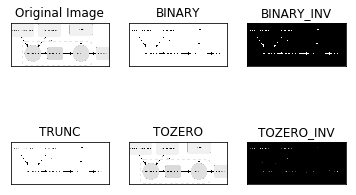

In [15]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, img_thresh1, img_thresh2, img_thresh3, img_thresh4, img_thresh5]

for idx in range(6):
    plt.subplot(2,3,idx+1), plt.title(titles[idx]), plt.imshow(images[idx], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

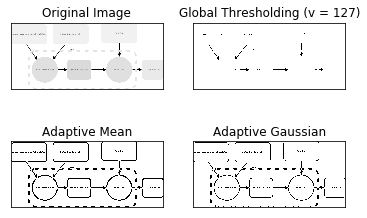

In [24]:
img2 = cv2.medianBlur(img,5)
ret, img_th1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
img_adthresh_mean = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
img_adthresh_gauss = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean', 'Adaptive Gaussian']
images = [img2, img_th1, img_adthresh_mean, img_adthresh_gauss]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Geometric transformations
#### Ref
[Geometric transformations](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)
#### Notes
1. Translations, rotation, affine transformations etc. - all of these using `cv2.warpAffine()` (2x3 transformation) and `cv2.warpPerspective()` (3x3 transformation)
2. Scaling - `cv2.resize()`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

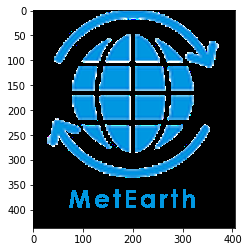

(437, 405, 3)


In [2]:
img = cv2.imread('/home/cognitifai/Pictures/logo_black_bd.png',1)
h,w = img.shape[:2]
plt.imshow(img,'gray')
plt.show()
print(img.shape)

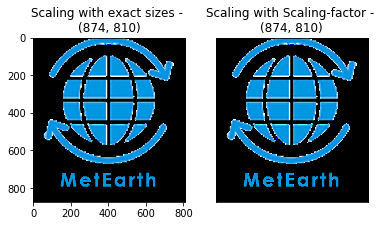

In [47]:
img_res1 = cv2.resize(img, (2*w,2*h),interpolation=cv2.INTER_LINEAR)
img_res2 = cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
plt.subplot(1,2,1), plt.imshow(img_res1), plt.title('Scaling with exact sizes - \n{}'.format(img_res1.shape[:2]))
plt.subplot(1,2,2), plt.imshow(img_res2), plt.title('Scaling with Scaling-factor - \n{}'.format(img_res2.shape[:2]))
plt.xticks([]), plt.yticks([])
plt.show()

#### Translation/Shift
- It is shift in the object location. for `(x,y)` direction, if its `(tx,ty)`, then trnasformation Matrix can be written as - ![Transformation Matrix 2x3 for translation](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/22fe551f03b8e94f1a7a75731a660f0163030540.png "Transformation matrix for translation")
- In opencv, we create `M` as `np.float32()` array and pass into `cv2.warpAffine()` function

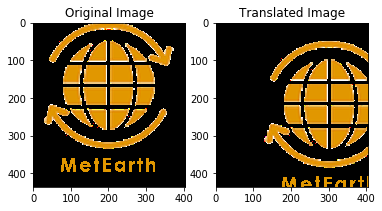

In [11]:
# shift of (100,50)
M_tr = np.float32([[1,0,100],[0,1,50]])
h,w = img.shape[:2]
img_tr = cv2.warpAffine(img, M_tr, (w,h))

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img_tr, cv2.COLOR_BGR2RGB)), plt.title('Translated Image')
plt.show()

#### Rotation
- OpenCV provides rotation matrix for scaled rotation with adjustable center of rotation, s.t. we can rotate about any center of rotation for any anngle `theta`
![Rotation Matrix for scaled rotation about some center of rotation](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/91ff2b9b1db0760f4764631010749e594cdf5f5f.png "")
where,
![Rotation Matrix for scaled rotation](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/383c254fc602c57a059a8296357f90fdf421aee7.png "")
- We can get transformation matrix using `cv2.getRotationMatrix2D`

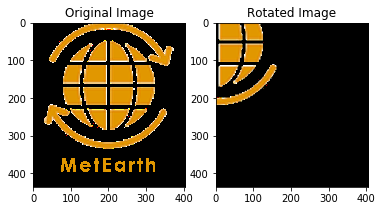

In [18]:
# Get rotation matrix about center of the image for 90 deg ccw. Coordinate origin is assumed to be top-left corner
h,w = img.shape[:2]
M_rot = cv2.getRotationMatrix2D((w/4,h/4), 180, 1)
img_rot = cv2.warpAffine(img, M_rot, (w,h))

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img_rot, cv2.COLOR_BGR2RGB)), plt.title('Rotated Image')
plt.show()

#### Affine Transformation
- Linear **2D** geometric transformation - *preserves parallel lines and planes. Sets of parallel lines remain parallel after an affine transformation*.
- 2D affine transformation is linear transformation in 3D. It do not preserve the origin in 2-D thus not-linear. 2-D linear tr. are *shear, scaling, rotation about origin*
- Provides correction to distorted image introduced due to camera position w.r.t scene.
- Useful in panorama stitching and image registration
- Represents generic affine transform, and includes translation, rotation, scale, shear or linear combination of these etc.
- To find the transformation matrix `M`, we need correspondence of **3 points** (3 points correspondance) between original and final images.
- `cv2.getAffineTransform` creates `2x3` matrix for passing into `cv2.warpAffine`
<!--![Affine transformations](https://neutrium.net/wp-content/uploads/2012/09/affine-transformation-all.png)-->

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


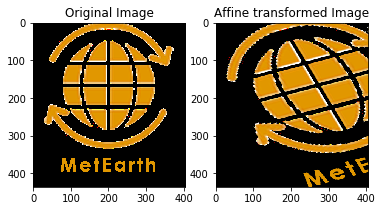

In [24]:
# create array of 3 original points
h,w = img.shape[:2]
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M_aff = cv2.getAffineTransform(pts1,pts2)
print(M_aff)

img_aff = cv2.warpAffine(img, M_aff, (w,h))

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img_aff, cv2.COLOR_BGR2RGB)), plt.title('Affine transformed Image')
plt.show()

#### Perspective Transformation
Ref - https://www.cse.unr.edu/~bebis/CS791E/Notes/PerspectiveProjection.pdf
- Described by 3x3 transformation matrix `M`.
- Straight lines remain straight, but parallel lines (ones not parallel to image plane) are not preserved, neither do distances and angles.
- Needs 4 points coorrespondence to determine `M`, out of which any 3 *shouldn't be collinear*
- `M` determined with `cv2.getPerspectiveTransform` and used with `cv2.warpPerspective`
- *Perspective projection* - Mapping from 3-d coordinates (of world object) to 2-d (image plane).

[[ 1.05587376e+00  9.18151097e-02 -6.50969128e+01]
 [ 4.69010049e-02  1.12562412e+00 -7.57920240e+01]
 [ 1.83251448e-04  5.13337001e-04  1.00000000e+00]]


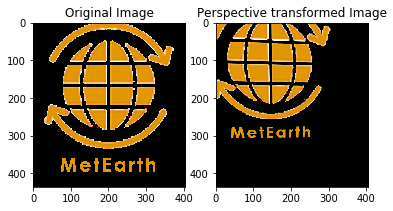

In [26]:
h,w = img.shape[:2]
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M_pers = cv2.getPerspectiveTransform(pts1,pts2)
print(M_pers)

img_pers = cv2.warpPerspective(img, M_pers, (w,h))

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img_pers, cv2.COLOR_BGR2RGB)), plt.title('Perspective transformed Image')
plt.show()

#### Smoothening Images by filtering
- Blur images using low pass filters
    - LPF removes noise, edges(HF elements) by blurring while HPF finds edges.
- Apply any other 2D filter to the image
    - `cv2.filter2D()` convolves (actually correlation) image with a kernel. 

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read original image
img = cv2.imread('/home/cognitifai/Pictures/landscape.jpg')

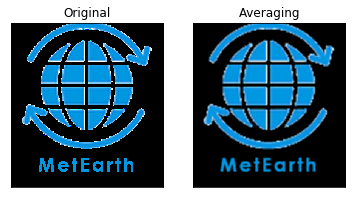

In [38]:
# 2D filtering -> 5x5 average filter (a LPF)
filt_5x5 = np.ones((5,5), dtype=np.float32)/25
img_avg5x5 = cv2.filter2D(img, -1, filt_5x5)

plt.subplot(121),plt.imshow(img),plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_avg5x5),plt.title('Averaging'), plt.xticks([]), plt.yticks([])
plt.show()

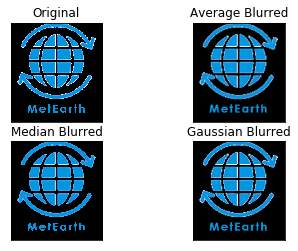

In [51]:
# Averaging filter function - normalized box filter
img_blur_avg = cv2.blur(img,(5,5))
img_blur_median = cv2.medianBlur(img,7) # Effective for removing Salt-and-Pepper noise
img_blur_gauss = cv2.GaussianBlur(img,(5,5),0) # Effective for removing Gaussian noise

plt.subplot(221),plt.imshow(img),plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_blur_avg),plt.title('Average Blurred'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_blur_median),plt.title('Median Blurred'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_blur_gauss),plt.title('Gaussian Blurred'), plt.xticks([]), plt.yticks([])

plt.show()

In [53]:
# Get gaussian kernel
print(cv2.getGaussianKernel(5,0))

[[0.0625]
 [0.25  ]
 [0.375 ]
 [0.25  ]
 [0.0625]]


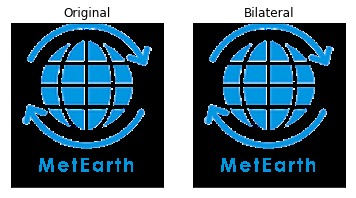

In [54]:
# Bilateral filter blurs image while preserving edges by including gaussian weights for intensity difference
img_bilat = cv2.bilateralFilter(img, 5, 75, 75)

plt.subplot(121),plt.imshow(img),plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_bilat),plt.title('Bilateral'), plt.xticks([]), plt.yticks([])
plt.show()

### Morphological operations (WIP)
#### Ref
[Morphological operations](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)
#### Notes
- Erosion, Dilation, Opening, Closing etc. -> Perfomed on binary image
- `cv2.erode(), cv2.dilate(), cv2.morphologyEx(), cv2.getStructuringElement()`

In [55]:
##

### Image Gradients
#### Ref
[Image Gradients](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html)

[Sobel-laplacian edge detectors](http://www.aishack.in/tutorials/sobel-laplacian-edge-detectors/)

[LoG](https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm)

[Zero-crossing detectors](https://homepages.inf.ed.ac.uk/rbf/HIPR2/zeros.htm)

[DoG vs LoG](https://dsp.stackexchange.com/questions/37673/what-is-the-difference-between-difference-of-gaussian-laplace-of-gaussian-and) : [DoG Analysis](http://fourier.eng.hmc.edu/e161/lectures/gradient/node9.html) and [LoG Analysis](http://fourier.eng.hmc.edu/e161/lectures/gradient/node8.html)

#### Notes
- We find image intensity gradients by applying differential operators to detect edges etc.
- 3 popular gradient filters or HPF like Laplacian, sobel, scharr are available as `cv2.Sobel(), cv2.Scharr(), cv2.Laplacian()`
#### Sobel/Scharr
- Sobel and Scharr are gradient based edge detector which work on 1st derivative
- sobelx (1st derivative along x-axis) => `[[1,0,-1],[2,0,-2],[1,0,-1]]` ; sobely (1st derivative along y-axis) => `[[1,2,1],[0,0,0],[-1,-2,-1]]` ; scharrx => `[[3,0,-3],[10,0,-10],[3,0,-3]]`
- From `Gx` and `Gy`, we can get edge-strength and edge-orientation.
#### Laplacian
- Laplacian operator performs 2nd-order spatial-derivative to detect gradient peaks.
- It may detect noise also, so its generally desirable to smooth the image first Gaussian kernel of width $\sigma$ *to remove noise of that spatial-order*.
- One of the **zero-crossing edge detector**.
- Unlike sobel/scharr, it uses just 1 convolution kernel to generate edge map. `[[0,-1,0],[-1,4,-1],[0,-1,0]]` OR `[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]`
- Its very sensitive to noise as it amplifies high-freq components. Thus apply Gaussian blur first. OR use **Laplacian of Gaussian (LoG)** kernel. More the std dev of Gaussian filter, more the noise and weak edges occur in zero-crossing map. Scale of edges also increases.
- These are faster to compute (as 1 filter) and produce good results.
- Direct application of Laplacian kernel *doesn't provide edge orientation* information as its *isotropic filter*
#### Difference of Gaussian (DoG)
- It involves the subtraction of one blurred version of an original image from another, less blurred version of the original.
- As the difference between two differently low-pass filtered images, the DoG is actually a band-pass filter, which removes high frequency components representing noise, and also some low frequency components representing the homogeneous areas in the image.
- Subtracting one image from the other preserves spatial information that lies between the range of frequencies that are preserved in the two blurred images.
- The frequency components in the passing band are assumed to be associated to the edges in the image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

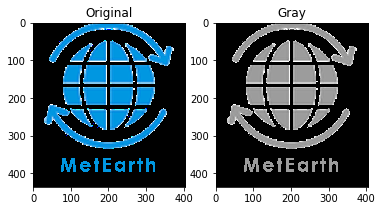

In [2]:
img = cv2.imread('/home/cognitifai/Pictures/logo_black_bd.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img_gray,"gray"),plt.title('Gray')
plt.show()

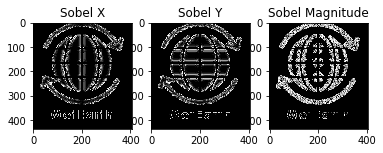

In [37]:
# Sobel operator has joint gaussian smoothing (for noise resistance) plus differentiation operator.
# We can provide direction of derivative as well, and the kernel size(-1 means 3x3) which should be odd value.
ksize=-1
img_sobelx = cv2.Sobel(img_gray, ddepth=cv2.CV_16S, dx=1, dy=0, ksize=ksize)
img_sobely = cv2.Sobel(img_gray, ddepth=cv2.CV_16S, dx=0, dy=1, ksize=ksize)

img_sobelx = np.uint16(np.abs(img_sobelx))  # To capture both maxima and minima edges
img_sobely = np.uint16(np.abs(img_sobely))  # To capture both maxima and minima edges

img_sobel = np.uint16(np.sqrt(img_sobelx**2 + img_sobely**2))

plt.subplot(131),plt.imshow(img_sobelx, "gray"),plt.title('Sobel X')
plt.subplot(132),plt.imshow(img_sobely,"gray"),plt.title('Sobel Y')
plt.subplot(133),plt.imshow(img_sobel,"gray"),plt.title('Sobel Magnitude')
plt.show()

In [3]:
# Reference - https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

# Laplacian - Because these kernels are approximating a second derivative measurement on the image, they are very sensitive to noise. 
# To counter this, the image is often Gaussian smoothed before applying the Laplacian filter. 
# This pre-processing step reduces the high frequency noise components prior to the differentiation step.
# In fact, since the convolution operation is associative, we can convolve the Gaussian smoothing filter 
# with the Laplacian filter first of all, and then convolve this hybrid filter with the image to achieve the required result. 
# Doing things this way has two advantages:
# 1. Since both the Gaussian and the Laplacian kernels are usually much smaller than the image, this method usually requires far fewer arithmetic operations.
# 2. The LoG (`Laplacian of Gaussian') kernel can be precalculated in advance so only one convolution needs to be performed at run-time on the image.

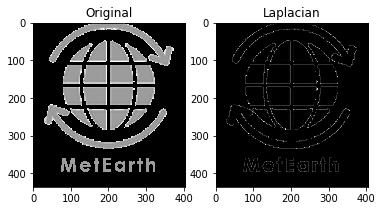

In [7]:
img_lap = cv2.Laplacian(img_gray, ddepth=cv2.CV_16S)
img_lap = np.uint32(np.abs(img_lap))

plt.subplot(121),plt.imshow(img_gray, "gray"),plt.title('Original')
plt.subplot(122),plt.imshow(np.uint8(img_lap*255/img_lap.max()), "gray"),plt.title('Laplacian')
plt.show()

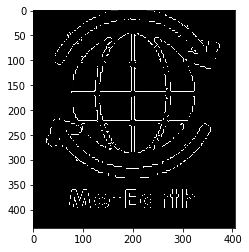

In [21]:
# DoG illustration
ksize = (5,5)
sigma = 0.2
factor = 1.6

img_g1 = cv2.GaussianBlur(img_gray,ksize,sigma,0)
img_g2 = cv2.GaussianBlur(img_gray,ksize,sigma*factor,0)

img_dog = img_g1-img_g2

plt.imshow(img_dog, "gray") ; plt.show()

### Canny Edge detector
#### Ref
[OpenCV-Canny](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)
#### Notes
Multistage algorithm for edge detection

1. Noise is removed by Gaussian 5x5 smoothening filter.
2. Find Gradient magnitude and direction map using `Gx, Gy` sobel filters. Gradient direction represents direction of maximum change and is perpendicular to the edge direction.
3. **Non-maximal suppression**  - *"if its not local maxima in its neighbouhood then suppress it"*
    - Here we analyze each pixel of grad-intensity image to see if its a local maxima in its neighbourhood in the gradient direction. If it is, we keep that pixel as **edge-pixel** candidate for the next stage else we suppress it (make it 0)
    - This way we can remove lots of noise and non edge pixels of regions having intensity variation, and generate binay image with *thin edges*
4. **Hysteresis Thresholding** - 
    - Further removes weak edges and false positives
    - Has 2 thresholds - *minVal* and *maxVal* (Parameters to be tuned as per requirement)
    - Starts parsing with a strong edge-pixel
    - Any pixel with grad-intensity
            > maxVal => strong edge-pixel
            < maxVal AND > minVal => weak edge-pixel
            < minVal => removed/discarded
    - "The smallest value between minVal and maxVal is used for edge linking. The largest value is used to find initial segments of strong edges. Decision to keep weak-edge pixel taken based on connectivity with strong/sure edge-pixel in its neighbouhood. If its connected, its considered as part of the edge, otherwise they are discarded."
    - Such Connectivity criteria helps in removing noise, specles as they are not connected with strong candidates.
    - We finally get curated edge map having strong and thin edges.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

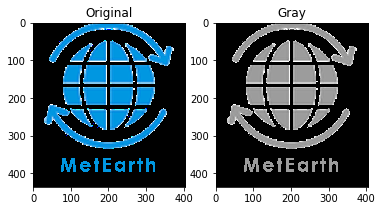

In [2]:
# Read images
img = cv2.imread('/home/cognitifai/Pictures/logo_black_bd.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img_gray,"gray"),plt.title('Gray')
plt.show()

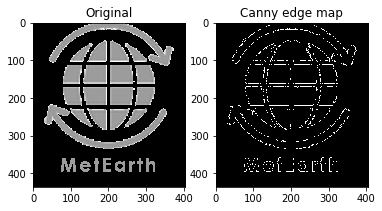

In [69]:
# Apply canny method
img_canny = cv2.Canny(img_gray, 150, 200, L2gradient=True)

plt.subplot(121),plt.imshow(img_gray, "gray"),plt.title('Original')
plt.subplot(122),plt.imshow(img_canny,"gray"),plt.title('Canny edge map')
plt.show()